# Perceptron Algorithm in NumPy and MatplotLib

Check out this article on my blog [100 Days of Deep Learning](https://nandeshwar.in/100-days-of-deep-learning/day-7-perceptrons-from-scratch-using-numpy/).

Perceptron algorithm is a building block of Neural Networks. In this notebook we implement the Perceptrons in NumPy and plot using MatplotLib.

**Perceptron is denoted as**

$$
\begin{aligned}
W_{x} + b = \sum_{i=1}^{n} w_{i} + b \\
\end{aligned}
$$

**Step Function**

Above output is passed through this step function

"**Yes**" if $ W_{x} + b \geq 0 $ else "**No**"

Assumptions
1. Binary classification dataset.
2. Labels are only 0 and 1.
3. Weights are denoted by __W__.
4. Labels are denoted by __y__.
5. Features are denoted by __X__.
6. Learning rate is denoted by __$ \alpha $__.

### Pseudocode for Perceptron Algorithm Implementation.

Initialize random weights $ W_{1}, W_{2}, W_{3} .... W_{n} $.

For every mis-classified point $ X_{1}, X_{2}, X_{3} .... X_{n} $.

----If prediction=0:

--------For i=1,2....n:

------------Change $ W_{i} + \alpha*X_{i} where \alpha $ is learning rate

--------Change $ b = b + \alpha $
    
----If prediction=1:
  
--------For i=1,2....n:

------------Change $ W_{i} - \alpha*X_{i} where \alpha $ is learning rate
        
--------Change $ b = b - \alpha $

## Create Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

## Plot Dataset

Text(0.5, 1.0, 'Binary data')

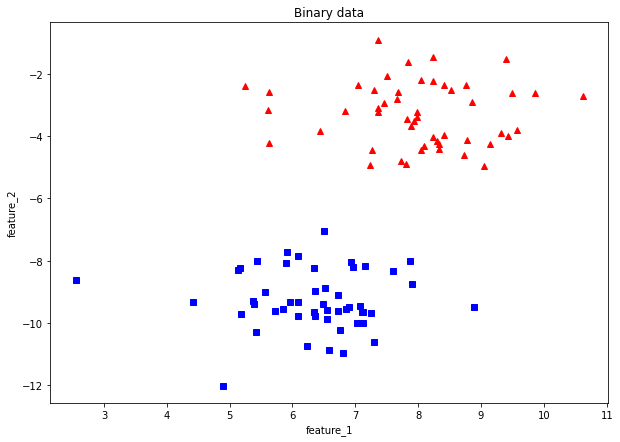

In [2]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=6)

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Binary data')

## Step function and prediction

In [3]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for index in range(len(X)):
        y_hat = prediction(X[index], W, b)
        if y_hat-y[index] == 1:
            W[0] -= X[index][0] * learn_rate
            W[1] -= X[index][1] * learn_rate
            b -= learn_rate
        elif y_hat-y[index] == -1:
            W[0] += X[index][0] * learn_rate
            W[1] += X[index][1] * learn_rate
            b += learn_rate
    
    return W, b

## Helper function to plot line

In [4]:
def plot_line(ax, slope, intercept, *args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + (slope * x_vals)
    ax.plot(x_vals, y_vals , *args, **kwargs)

In [5]:
# Initialize random weights
W = np.random.rand(2,1)

# Initialize random
b = np.random.rand(1) + X.max()

# Learning rate
learning_rate = 0.01

def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    plt.scatter(X[:,0], X[:,1], c=[3 if x==0 else 1 for x in y])
    ax = plt.gca()
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    boundary_lines = []
    for i in range(num_epochs):
        
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        if i%2 == 0: # to reduce clutter on plot
            plot_line(ax, -W[0]/W[1], -b/W[1], *['--g'], **{'linewidth': 0.5} )
        
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    
    plot_line(ax, boundary_lines[-1][0], boundary_lines[-1][1], *['r'], **{'linewidth': 1} )
    
    plt.show()
    
    return boundary_lines


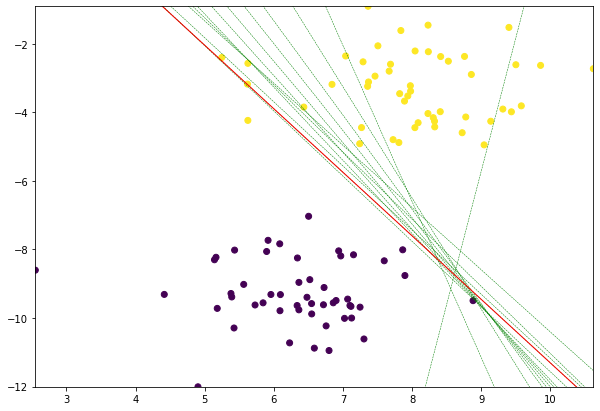

In [6]:
lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)

Increase epoch to 35

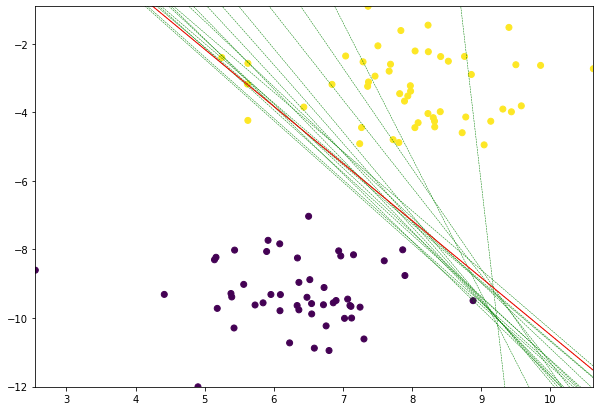

In [7]:
lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 35)

### Let's see what happens if we increase epoch to 50

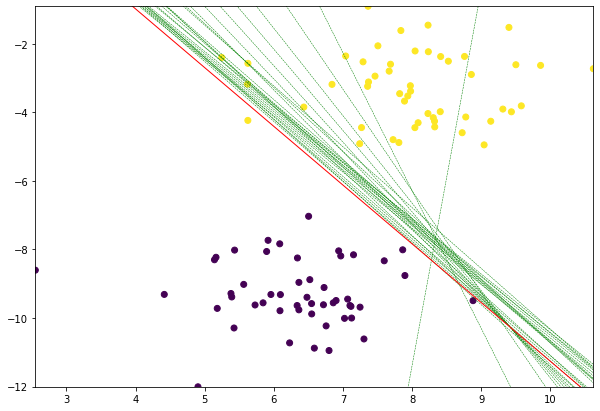

In [8]:
lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50)

As you can see from the above "Red line" is achieving a significant accuracy as it is mis-classifying only one yellow point in the dataset.

Our model is performing great on this data. Great!